In [39]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import default_rng , MT19937
import matplotlib.colors as mcolors
from tqdm import tqdm
from matplotlib.animation import FuncAnimation, PillowWriter


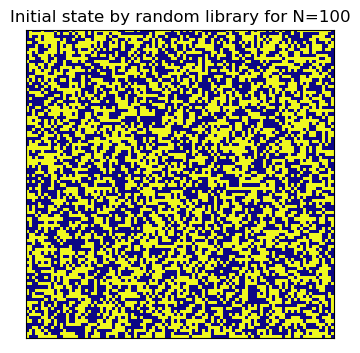

In [40]:
def Initialize(N):
    np.random.seed(42)
    state=np.random.choice(np.array([-1,1]),size=(N,N))
    return  state
N_test=100
init_state=Initialize(N_test)
fig,ax=plt.subplots(figsize=(6,4))

ax.matshow(init_state,cmap=plt.cm.plasma)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Initial state by random library for N='+str(N_test))
plt.show()

# Spin Flip by Metropolis Algorithm and Spins Sweeps

In [41]:
def Spin_Flip_Met_Alg(N,state, Temper):
  i, j = np.random.randint(N), np.random.randint(N)  #random spin sellection
  # sum of nearest neighbour values in the lattice
  nn = state[(i-1)%N, j] + state[(i+1)%N, j] + state[i, (j-1)%N] + state[i, (j+1)%N] 
  
  # Energy difference after the flip
  deltaE = 2 * state[i,j] * nn

  # Metropolis
  if (deltaE < 0 or np.random.random() < np.exp(- deltaE/Temper)):
    state[i,j] = -1. * state[i,j]
  return state

def Spins_Sweeps(N,state,Temper):  # spin sweep, try to sweep all sites and hence N**2
  for i in range(N**2):
      state=Spin_Flip_Met_Alg(N,state,Temper)
  return state

In [42]:
N=100  # number of sites in one direction and in total I have 100x100 site
T0=0.001
T1=1   #k_B=1
T2=3
init_state=Initialize(N)

N_sweeps=10**2  # Number of Sweeps. It needs to be 10**4 or 10**5 at the end



100%|██████████| 100/100 [00:08<00:00, 11.27it/s]


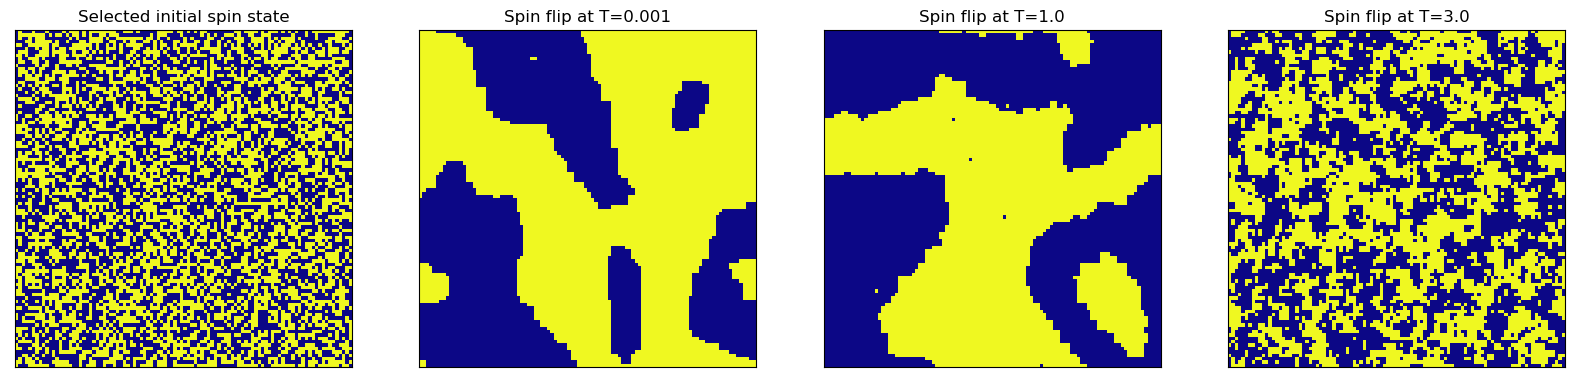

In [43]:

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(20,6))
ax[0].matshow(init_state, cmap = plt.cm.plasma)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("Selected initial spin state")

Temp=np.array([0.001,1.0,3.0])

for i in range(1,4):
    In_St0=np.copy(init_state)
    for j in tqdm(range(N_sweeps)):
        state_at_T0=Spins_Sweeps(N,In_St0,Temp[i-1])
    ax[i].matshow(state_at_T0, cmap = plt.cm.plasma)   
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("Spin flip at T="+str(Temp[i-1]))

plt.show()

# Functions to calculate enegry and magnetization for the interval $T \in [1.5,3]$

In [44]:
def Energy(N,state):
    E=0
    for i in range(N):
        for j in range(N):
            near_neighb=state[(i-1)%N,j]+state[(i+1)%N,j]+state[i,(j-1)%N]+state[i,(j+1)%N]
            E-=state[i,j]*near_neighb
    return E/2.0

def Magnetization(state):
    mag = np.sum(state)
    return mag

100%|██████████| 100/100 [00:09<00:00, 10.78it/s]


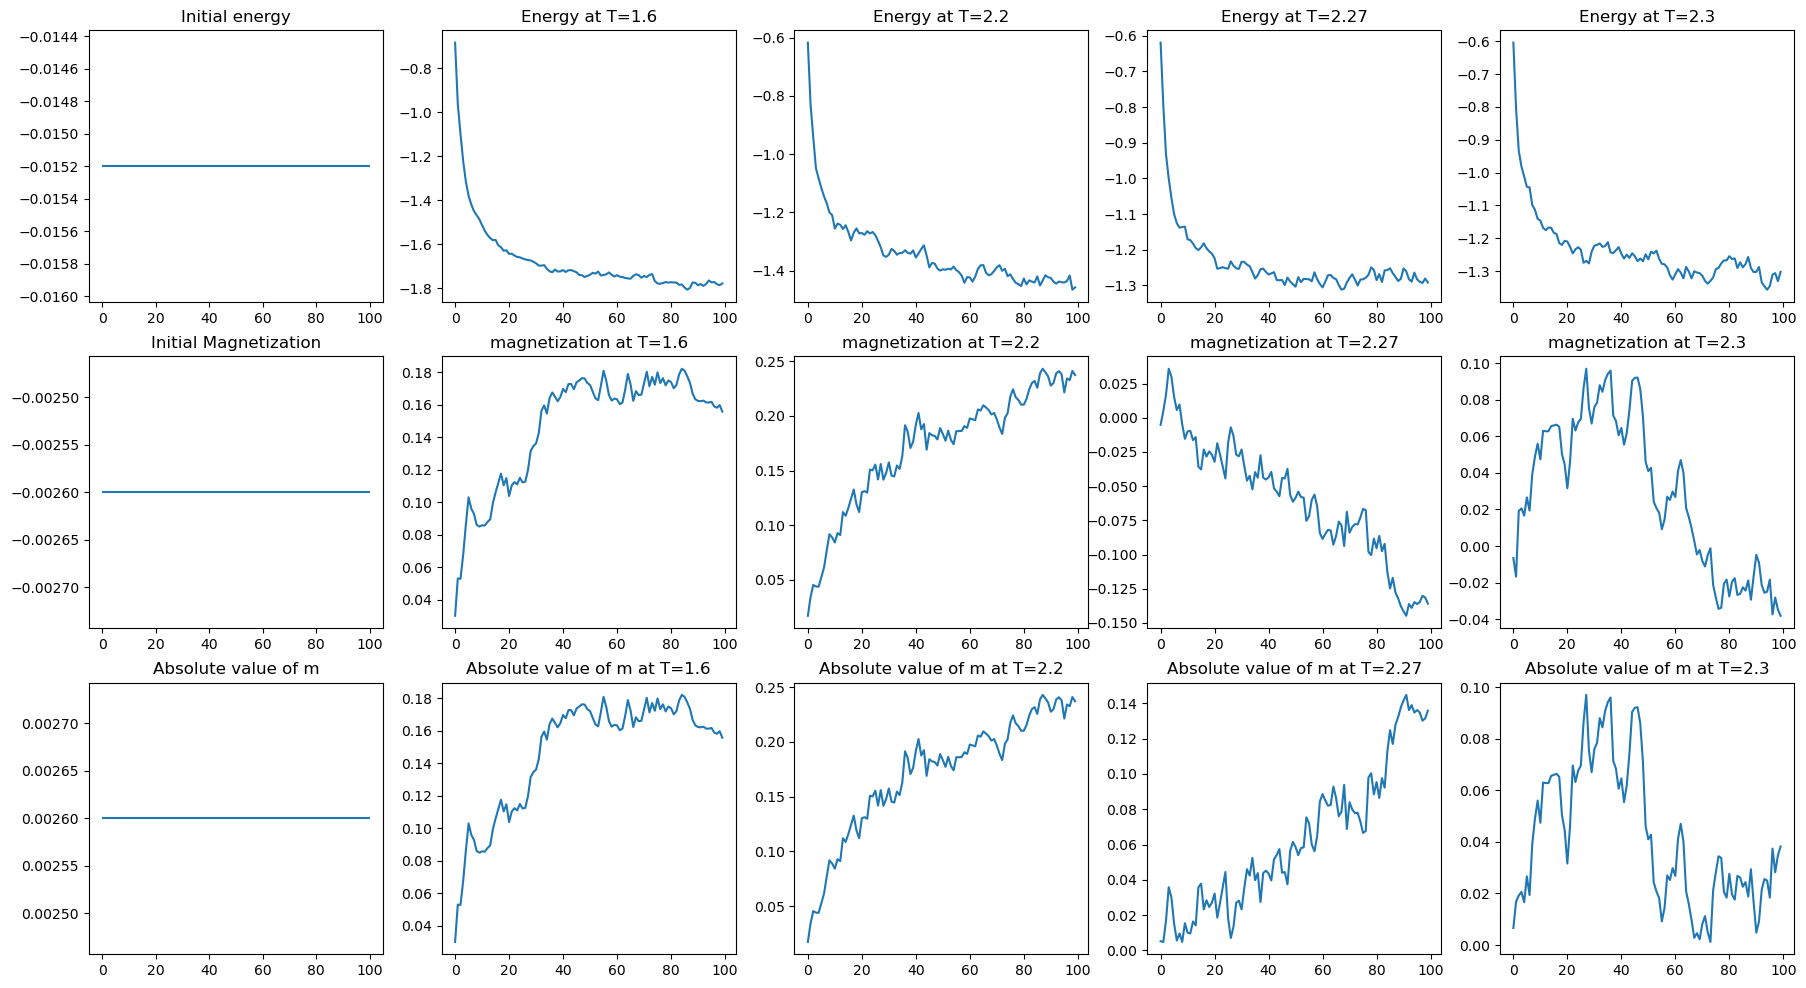

In [45]:

fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize=(22,12))
init_state=np.copy(init_state)
E_initial=Energy(N,init_state)
ax[0][0].set_title("Initial energy")
ax[0][0].hlines(E_initial/N**2,0,N_sweeps)
Mag0=Magnetization(init_state)
ax[1][0].set_title("Initial Magnetization")
ax[1][0].hlines(Mag0/N**2,0,N_sweeps)

ax[2][0].set_title("Absolute value of m")
ax[2][0].hlines(np.abs(Mag0)/N**2,0,N_sweeps)

T=np.array([1.6,2.2,2.27,2.3,3])
for i in range(1,len(T)):
    Mag=[]
    Energy_at_T=[]
    In_St=np.copy(init_state)
    for j in tqdm(range(N_sweeps)):
        state_at_T=Spins_Sweeps(N,In_St,T[i-1])
        state_at_T_copy=np.copy(state_at_T)
        Energy_at_T.append(Energy(N,state_at_T)/N**2)
        mag_at_T = Magnetization(state_at_T_copy)/N**2
        Mag.append(mag_at_T)
    ax[0][i].plot(range(N_sweeps),Energy_at_T)
    ax[0][i].set_title("Energy at T="+str(T[i-1]))
    ax[1][i].plot(range(N_sweeps),Mag)
    ax[1][i].set_title("magnetization at T="+str(T[i-1]))
    ax[2][i].plot(range(N_sweeps),np.abs(Mag))
    ax[2][i].set_title("Absolute value of m at T="+str(T[i-1]))
plt.show()